In [29]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#importing dataset 
df = pd.read_csv(r"C:\Users\sahil ladwal\Downloads\Mall_Customers.csv")


In [31]:
#Displaying the first 5 rows of the dataset
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
#Displaying the shape of the dataset
df.shape


(200, 5)

In [33]:
#Displaying the columns of the dataset
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [34]:
#Displaying the data types of the columns
df.dtypes


CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [35]:
#Displaying the information of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [36]:
#Displaying the statistical summary of the dataset
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [37]:
#Displaying the null values in the dataset
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [38]:
#Displaying the unique values in the dataset
df.nunique()


CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

Data Preprocessing

In [39]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler

# Selecting relevant features
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
X = df[features]

# Applying StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

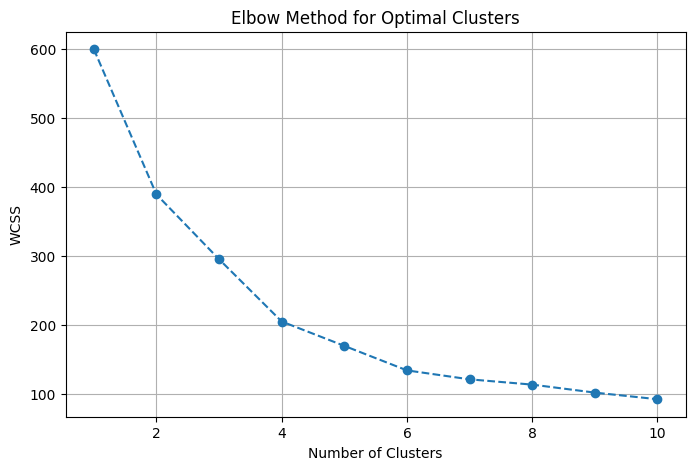

In [40]:
#Elbow Method for Optimal Clusters
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # WCSS

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [41]:
#Silhouette Score for Evaluation
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f'k={k}, Silhouette Score={score:.3f}')

k=2, Silhouette Score=0.335
k=3, Silhouette Score=0.358
k=4, Silhouette Score=0.404
k=5, Silhouette Score=0.408
k=6, Silhouette Score=0.431
k=7, Silhouette Score=0.410
k=8, Silhouette Score=0.367
k=9, Silhouette Score=0.374
k=10, Silhouette Score=0.362


In [42]:
#Applying KMeans Clustering
# Assuming k = 5 
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

Data Visualization

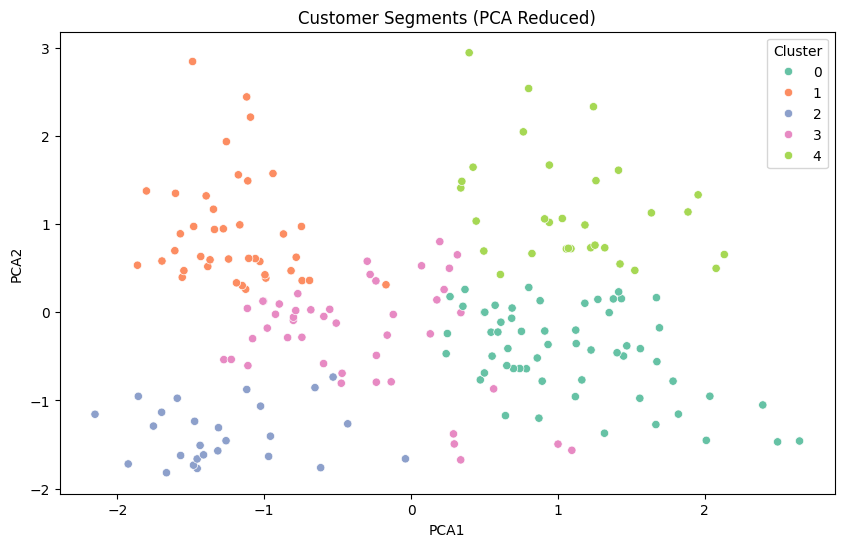

In [43]:
#2D Scatter Plot using PCA or t-SNE

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", palette="Set2", data=df)
plt.title("Customer Segments (PCA Reduced)")
plt.show()

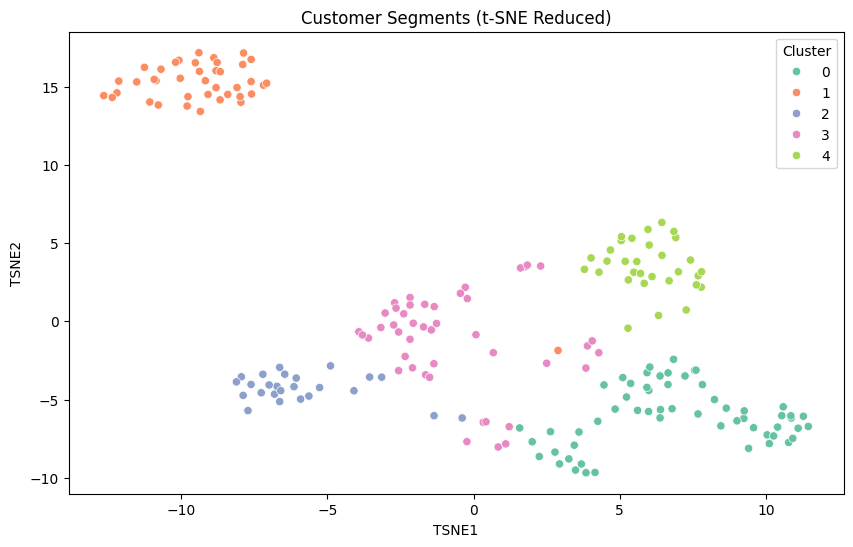

In [44]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

df["TSNE1"] = X_tsne[:, 0]
df["TSNE2"] = X_tsne[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x="TSNE1", y="TSNE2", hue="Cluster", palette="Set2", data=df)
plt.title("Customer Segments (t-SNE Reduced)")
plt.show()

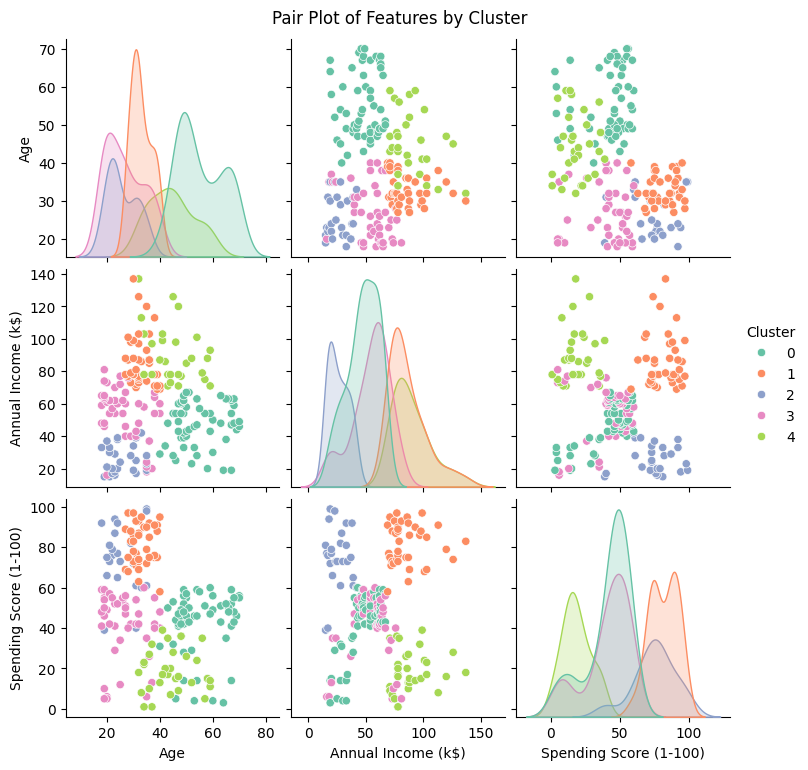

In [45]:
#Pair Plots to Visualize Relationships Between Features within Clusters
sns.pairplot(df, vars=["Age", "Annual Income (k$)", "Spending Score (1-100)"], hue="Cluster", palette="Set2")
plt.suptitle("Pair Plot of Features by Cluster", y=1.02)
plt.show()

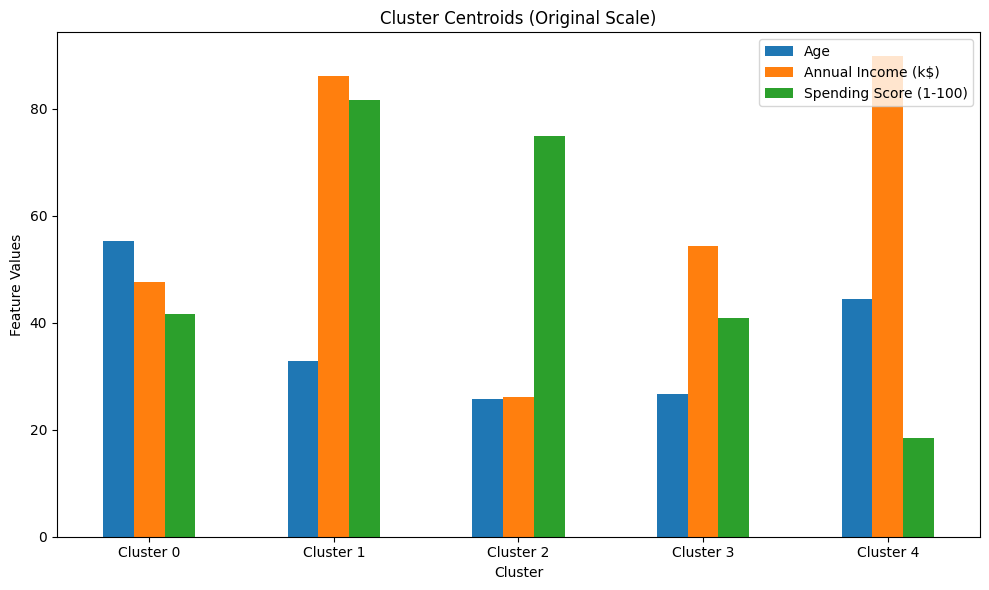

In [47]:
#Centroid Visuals to Show the Centroids of Each Cluster for Better Interpretation
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features)
centroids_scaled_back = pd.DataFrame(scaler.inverse_transform(centroids), columns=features)

centroids_scaled_back.plot(kind='bar', figsize=(10, 6))
plt.title("Cluster Centroids (Original Scale)")
plt.xlabel("Cluster")
plt.ylabel("Feature Values")
plt.xticks(ticks=np.arange(k), labels=[f'Cluster {i}' for i in range(k)], rotation=0)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()